In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
%%R

library(jpeg)
library(png)
library(grid)
library(hrbrthemes)



R[write to console]: NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

R[write to console]:       Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

R[write to console]:       if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [5]:
df_five = pd.read_csv('shootings_five_years.csv')
df_five.tail(20) 

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
2681,1037515,2018-01-28,Indiana,Indianapolis,1313 N Sherman Dr,2,3,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2682,1038429,2018-01-28,Pennsylvania,Reading,123 S 3rd St,4,0,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2683,1037438,2018-01-27,Kentucky,Bowling Green,645 Pearl Street,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2684,1037541,2018-01-27,California,Los Angeles,243 East 119th St,0,5,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2685,1035803,2018-01-25,District of Columbia,Washington,1600 block of Kenilworth Ave NE,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2686,1033262,2018-01-23,Kentucky,Benton,416 High School Rd,2,14,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2687,1034205,2018-01-23,Pennsylvania,Philadelphia,N 24th St and Ridge Ave,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2688,1032393,2018-01-21,Florida,Orlando,3101 Willow Bend Blvd,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2689,1031851,2018-01-21,Illinois,Chicago,3200 W Division St,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2690,1029095,2018-01-17,District of Columbia,Washington,2000 block of 16th St SE,1,3,https://www.gunviolencearchive.org/incident/10...,2018,01-2018


In [6]:
df_five.dtypes

incident_id        int64
incident_date     object
state             object
city_or_county    object
address           object
killed             int64
injured            int64
incident_url      object
year               int64
month-year        object
dtype: object

In [7]:
df_five['month-year'] = pd.to_datetime(df_five['month-year'], format='%m-%Y').dt.strftime('%m-%Y')
df_five.head()


,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022


In [8]:
df_five['new_col'] = pd.to_datetime(df_five['month-year'], format='%m-%Y')
df_five['month-year'] = df_five['new_col'].dt.to_period('M')
df_five.drop(['new_col'], axis=1, inplace=True)
df_five.dtypes


incident_id           int64
incident_date        object
state                object
city_or_county       object
address              object
killed                int64
injured               int64
incident_url         object
year                  int64
month-year        period[M]
dtype: object

In [9]:
df_five.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12


In [10]:
killed_by_year = df_five.groupby('year')['killed'].sum()
killed_by_year

year
2018    372
2019    465
2020    513
2021    706
2022    676
Name: killed, dtype: int64

In [11]:
# put the data into a dataframe

df_killed = pd.DataFrame(killed_by_year)
df_killed = df_killed.reset_index()
df_killed

,year,killed
0,2018,372
1,2019,465
2,2020,513
3,2021,706
4,2022,676


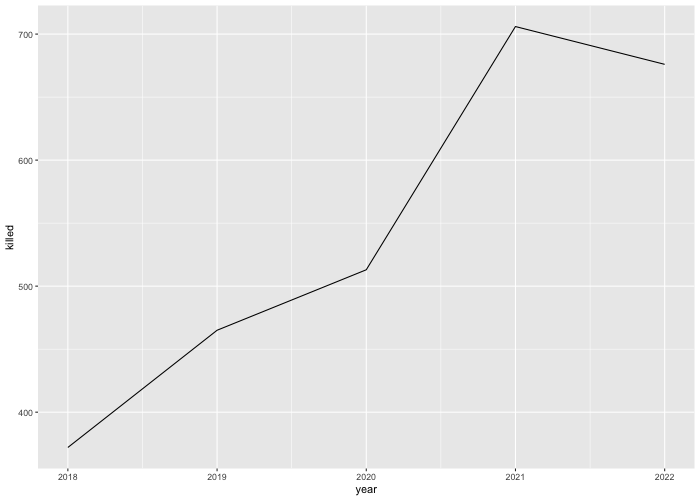

In [12]:
%%R -i df_killed  -h 500 -w 700

ggplot(df_killed) +
    aes(x = year, y = killed) +
    geom_line() 
 


In [13]:
df_decade = pd.read_csv('shootings_eight_years.csv')
df_decade.tail(20)

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
4741,104218,2014-02-05,Illinois,Chicago,6740 N Clark St,1,3,https://www.gunviolencearchive.org/incident/10...,2014,02-2014
4742,103698,2014-02-03,Indiana,Franklin,2100 block of Bridlewood Dr,3,2,https://www.gunviolencearchive.org/incident/10...,2014,02-2014
4743,140117,2014-01-30,Texas,Cypress,14015 Fosters Creek Dr,4,0,https://www.gunviolencearchive.org/incident/14...,2014,01-2014
4744,101301,2014-01-27,North Carolina,Rocky Mount,821 Word Plaza,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4745,113665,2014-01-27,Washington,Seattle,2nd Avenue South and South Main Street,1,4,https://www.gunviolencearchive.org/incident/11...,2014,01-2014
4746,100434,2014-01-25,Illinois,Chicago,S Union Ave and W 51st St,1,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4747,100568,2014-01-25,Florida,Belle Glade,600 block of Covenant Drive,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4748,98836,2014-01-21,New Jersey,Newark,Springfield Avenue,2,3,https://www.gunviolencearchive.org/incident/98836,2014,01-2014
4749,104902,2014-01-20,Virginia,Manassas,8509 Rixlew Ln,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4750,97407,2014-01-16,Oklahoma,Ardmore,H St NE and Martin Luther King Blvd,2,4,https://www.gunviolencearchive.org/incident/97407,2014,01-2014


In [14]:
# remove duplicates by incident_id

df_decade = df_decade.drop_duplicates(subset='incident_id', keep='first')
df_decade

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
...,...,...,...,...,...,...,...,...,...,...
4756,95550,2014-01-12,Alabama,Huntsville,University Drive,0,5,https://www.gunviolencearchive.org/incident/95550,2014,01-2014
4757,95146,2014-01-11,Mississippi,Jackson,3430 W. Capitol Street,0,4,https://www.gunviolencearchive.org/incident/95146,2014,01-2014
4758,94514,2014-01-05,Pennsylvania,Erie,829 Parade St,1,3,https://www.gunviolencearchive.org/incident/94514,2014,01-2014
4759,92704,2014-01-03,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3,https://www.gunviolencearchive.org/incident/92704,2014,01-2014


In [15]:
# group by state and year

In [16]:
# create a new column called 'victims_count' which is the sum of killed and injured

df_decade['victims_count'] = df_decade['killed'] + df_decade['injured']
df_decade.head() 

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,5
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4


In [17]:
killed = df_decade.groupby('year')['killed'].sum()
killed

year
2014    275
2015    369
2016    453
2017    443
2018    372
2019    465
2020    513
2021    706
2022    676
Name: killed, dtype: int64

In [18]:

df_decade[df_decade['year'] == 2017].sort_values(by='killed', ascending=False).head(10)



,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
2773,946496,2017-10-01,Nevada,Las Vegas,3950 Las Vegas Blvd S,59,441,https://www.gunviolencearchive.org/incident/94...,2017,10-2017,500
2738,980577,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20,https://www.gunviolencearchive.org/incident/98...,2017,11-2017,47
2796,930569,2017-09-10,Texas,Plano,1712 West Spring Creek Parkway,9,1,https://www.gunviolencearchive.org/incident/93...,2017,09-2017,10
2915,853756,2017-05-27,Mississippi,Bogue Chitto,2871 Lee Dr,8,1,https://www.gunviolencearchive.org/incident/85...,2017,05-2017,9
2729,987611,2017-11-14,California,Corning,17357 Stagecoach Rd,6,12,https://www.gunviolencearchive.org/incident/98...,2017,11-2017,18
2903,859875,2017-06-05,Florida,Orlando,2427 Forsyth Rd,6,0,https://www.gunviolencearchive.org/incident/85...,2017,06-2017,6
2981,800363,2017-03-22,Wisconsin,Rothschild,1133 E Grand Ave,5,0,https://www.gunviolencearchive.org/incident/80...,2017,03-2017,5
3044,743995,2017-01-06,Florida,Fort Lauderdale,100 Terminal Dr,5,6,https://www.gunviolencearchive.org/incident/74...,2017,01-2017,11
2960,813821,2017-04-07,Texas,Houston,3829 Mount Pleasant St,5,0,https://www.gunviolencearchive.org/incident/81...,2017,04-2017,5
2889,868363,2017-06-15,New Mexico,La Madera,491 NM-111,5,0,https://www.gunviolencearchive.org/incident/86...,2017,06-2017,5


In [19]:
# put killed in a dataframe

df_killed = pd.DataFrame(killed)
df_killed = df_killed.reset_index()
df_killed

,year,killed
0,2014,275
1,2015,369
2,2016,453
3,2017,443
4,2018,372
5,2019,465
6,2020,513
7,2021,706
8,2022,676


In [20]:
injured = df_decade.groupby('year')['injured'].sum()
injured

year
2014    1086
2015    1337
2016    1539
2017    1809
2018    1330
2019    1712
2020    2540
2021    2827
2022    2702
Name: injured, dtype: int64

In [21]:
df_injured = pd.DataFrame(injured)
df_injured = df_injured.reset_index()
df_injured

,year,injured
0,2014,1086
1,2015,1337
2,2016,1539
3,2017,1809
4,2018,1330
5,2019,1712
6,2020,2540
7,2021,2827
8,2022,2702


In [22]:

incidents = df_decade.groupby('year')['incident_id'].count()
incidents

year
2014    273
2015    336
2016    383
2017    349
2018    336
2019    417
2020    610
2021    690
2022    648
Name: incident_id, dtype: int64

In [23]:
df_incidents = pd.DataFrame(incidents)
df_incidents = df_incidents.reset_index()
df_incidents.rename(columns={'incident_id': 'incident_count'}, inplace=True)
df_incidents

,year,incident_count
0,2014,273
1,2015,336
2,2016,383
3,2017,349
4,2018,336
5,2019,417
6,2020,610
7,2021,690
8,2022,648


In [24]:
df_vic_count = df_decade.groupby('year')['victims_count'].sum()
df_vic_count

year
2014    1361
2015    1706
2016    1992
2017    2252
2018    1702
2019    2177
2020    3053
2021    3533
2022    3378
Name: victims_count, dtype: int64

In [25]:
df_vic_count = pd.DataFrame(df_vic_count)
df_vic_count = df_vic_count.reset_index()
df_vic_count


,year,victims_count
0,2014,1361
1,2015,1706
2,2016,1992
3,2017,2252
4,2018,1702
5,2019,2177
6,2020,3053
7,2021,3533
8,2022,3378


In [26]:
# combine dataframe

df_victims = pd.merge(df_killed, df_injured, on='year')
df_victims = pd.merge(df_victims, df_incidents, on='year')
df_victims = pd.merge(df_victims, df_vic_count, on='year')
df_victims

,year,killed,injured,incident_count,victims_count
0,2014,275,1086,273,1361
1,2015,369,1337,336,1706
2,2016,453,1539,383,1992
3,2017,443,1809,349,2252
4,2018,372,1330,336,1702
5,2019,465,1712,417,2177
6,2020,513,2540,610,3053
7,2021,706,2827,690,3533
8,2022,676,2702,648,3378


In [27]:
df_victims.dtypes

year              int64
killed            int64
injured           int64
incident_count    int64
victims_count     int64
dtype: object

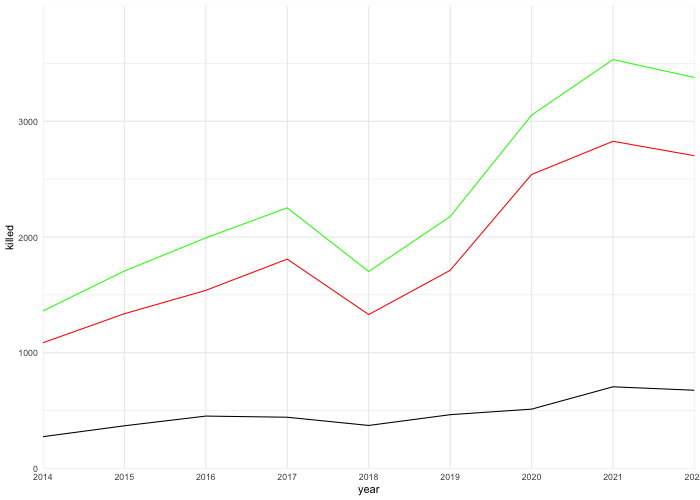

In [28]:
%%R -i df_victims -h 500 -w 700

ggplot(df_victims) +
    aes(x = year, y = killed) +
    geom_line() +
    geom_line(aes(y = injured), color = 'red') +
    geom_line(aes(y = victims_count), color = 'green') +
    scale_x_continuous(breaks = seq(2014, 2022, by = 1)) +
    scale_y_continuous(breaks = seq(0, 3000, by = 1000), limits = c(0, 4000)) +
    coord_cartesian(xlim = c(2014,2022), expand = FALSE) +
    theme_minimal() +
    theme(
    panel.grid.minor.x = element_blank()
  )
 

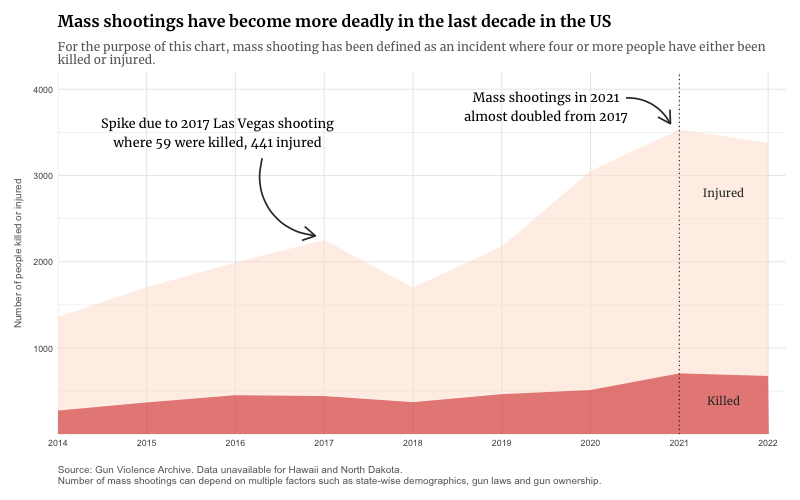

In [29]:
%%R -i df_victims -h 500 -w 800

ggplot(df_victims) +
    aes(x = year, y = victims_count) +
    geom_area(fill = '#fee0d2', alpha=0.5, position = "stack") +
    # geom_area(aes(y = injured), fill = 'gray36', alpha=0.5, position = "stack") +
    geom_area(aes(y = killed), fill = 'red3', alpha=0.5, position = "stack") +
    geom_vline(xintercept = 2021, color = 'black', linetype = "dotted", size = 0.5) +
    scale_x_continuous(breaks = seq(2014, 2022, by = 1)) +
    scale_y_continuous(breaks = seq(1000, 4000, by = 1000), limits = c(0, 4200)) + # how do I get rid of the y-axis extending beyond side of graph?
    coord_cartesian(xlim = c(2014,2022.2), expand = FALSE) +
    theme_minimal() +
    theme(
    panel.grid.minor.x = element_blank(),
    plot.title = element_text(face = "bold", size = 16, family = "Merriweather", color = "black", margin = margin(b = 11)),
    plot.subtitle = element_text(size = 12, family = "Merriweather", color = "gray40"),
    plot.caption = element_text(hjust = 0, size = 10, family = "Arial", color = "gray40"),
    axis.title.y = element_text(size = 10, family = "Arial", color = "gray40", margin = margin(r = 10)),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
  ) +
    annotate("curve",
        x = 2016.3, y = 3200,
        xend = 2016.9, yend = 2300,
        arrow = arrow(length = unit(0.5, "cm")),
        curvature = 0.5, size = 0.8, color = "gray20") +
      annotate("curve",
        x = 2020.4, y = 3900,
        xend = 2020.9, yend = 3600,
        arrow = arrow(length = unit(0.5, "cm")),
        curvature = -0.3, size = 0.8, color = "gray20") +
    annotate("text",
        x = 2015.8, y = 3500,
        label = "Spike due to 2017 Las Vegas shooting\nwhere 59 were killed, 441 injured", size = 4.5, family = "Merriweather", color = "black") +
    annotate("text",
        x = 2019.5, y = 3800,
        label = "Mass shootings in 2021\nalmost doubled from 2017", size = 4.5, family = "Merriweather", color = "black") +    
    annotate("text",
        x = 2021.5, y = 390,
        label = "Killed", size = 4, family = "Merriweather", color = "gray20",) +
    annotate("text",
        x = 2021.5, y = 2800,
        label = "Injured", size = 4, family = "Merriweather", color = "gray20") +
    # annotate("text",
    #     x = 2021.5, y = 3300,
        # label = "Total", size = 4, family = "Merriweather", color = "gray20") +
    labs(title = "Mass shootings have become more deadly in the last decade in the US",
       subtitle = "For the purpose of this chart, mass shooting has been defined as an incident where four or more people have either been\nkilled or injured.",
       x = "",
       y = "Number of people killed or injured",
       caption = "Source: Gun Violence Archive. Data unavailable for Hawaii and North Dakota.\nNumber of mass shootings can depend on multiple factors such as state-wise demographics, gun laws and gun ownership.")

number of incidents by year - cluster bubble? big bubble number of shootings and small bubble killed 
change area chart to stacked bar chart

In [30]:
df_decade.head() 

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,5
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4


In [31]:
# number of incidents by state by descending order 

df_state = df_decade.groupby('state')['incident_id'].count()
df_state = pd.DataFrame(df_state)
df_state.rename(columns={'incident_id': 'incident_count'}, inplace=True)
df_state.sort_values(by='incident_count', ascending=False, inplace=True)
df_state = df_state.reset_index()
df_state

# normalize the data with population - mass shootings per 100,000 people
# read - https://www.bmj.com/content/364/bmj.l542 

# ref - https://www.abc.net.au/news/2015-12-13/only-five-us-states-spared-from-mass-shootings-this-year/7024390
# reasons for more vs less mass shootings in a state - population? gun laws? gun ownership? 
# can compare top three with lowest three - how have the laws changed in these states? data on gun ownership? normalize by population?
# check laws in 2014 vs 2022 - https://www.gunlawscorecard.org/


,state,incident_count
0,Illinois,417
1,California,370
2,Texas,274
3,Florida,238
4,Pennsylvania,191
5,New York,190
6,Louisiana,181
7,Georgia,158
8,Ohio,154
9,Michigan,130


In [32]:
# number of incidents by state by year 

df_state = df_decade.groupby(['year', 'state'])['incident_id'].count()
df_state = pd.DataFrame(df_state)
df_state = df_state.reset_index()
df_state.rename(columns={'incident_id': 'incident_count'}, inplace=True)
df_state 


# has the gap between the number of shootings in states that have strict gun laws vs states that have more relaxed laws
# widened or narrowed over the years?

,year,state,incident_count
0,2014,Alabama,2
1,2014,Alaska,1
2,2014,Arizona,1
3,2014,Arkansas,2
4,2014,California,41
...,...,...,...
356,2022,Tennessee,17
357,2022,Texas,50
358,2022,Virginia,20
359,2022,Washington,11


In [66]:
df_state_pivot2 = df_state.pivot_table(index='state', columns='year', values='incident_count', aggfunc='sum').reset_index()
df_state_pivot2


year,state,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,2.0,4.0,15.0,7.0,14.0,12.0,11.0,23.0,16.0
1,Alaska,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN
2,Arizona,1.0,6.0,4.0,5.0,2.0,6.0,4.0,6.0,13.0
3,Arkansas,2.0,2.0,3.0,3.0,6.0,5.0,13.0,5.0,5.0
4,California,41.0,27.0,46.0,38.0,35.0,49.0,39.0,45.0,50.0
5,Colorado,2.0,3.0,4.0,2.0,8.0,4.0,11.0,13.0,13.0
6,Connecticut,1.0,2.0,6.0,2.0,2.0,3.0,7.0,2.0,3.0
7,Delaware,NaN,1.0,2.0,1.0,1.0,2.0,3.0,7.0,2.0
8,District of Columbia,6.0,3.0,5.0,5.0,6.0,7.0,8.0,16.0,9.0
9,Florida,17.0,26.0,30.0,24.0,30.0,15.0,34.0,31.0,31.0


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


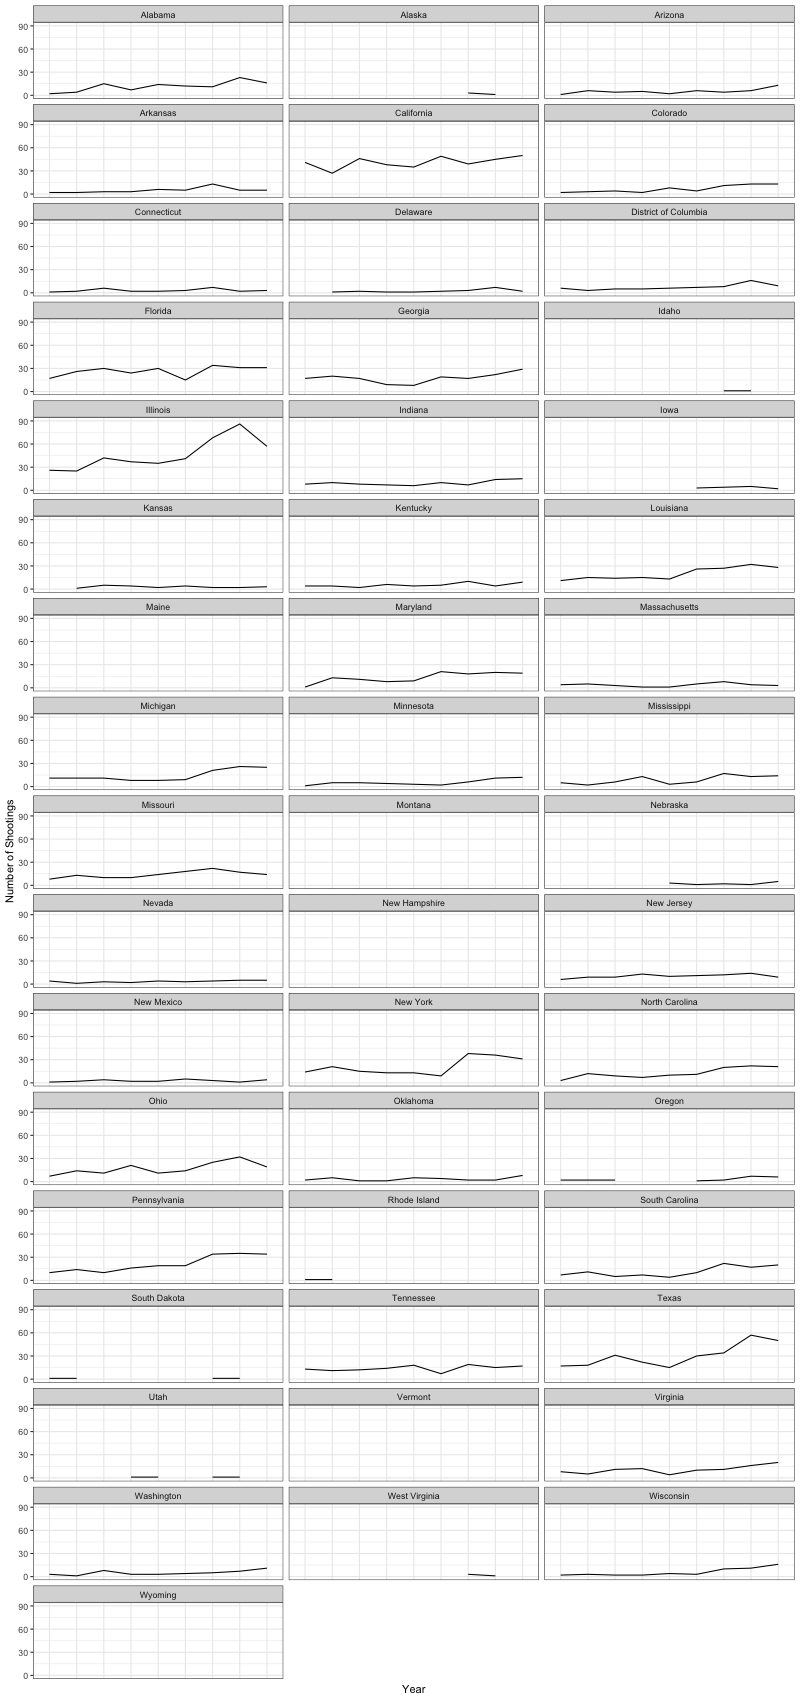

In [85]:
%%R -h 1700 -w 800

df_state_pivot2_long <- pivot_longer(df_state_pivot2, cols = c("2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"), names_to = "year", values_to = "shootings")

ggplot(df_state_pivot2_long, aes(x = year, y = shootings, group = state)) +
  geom_line() +
  facet_wrap(~ state, ncol = 3) +
  scale_y_continuous(limits = c(0, 90), breaks = seq(0, 90, by = 30)) +
  theme_bw() +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
  ) +
  labs(x = "Year", y = "Number of Shootings")



In [34]:
# save the data as a csv file

df_state_pivot2.to_csv('states_by_year.csv', index=False)

In [35]:
# read the csv file

df_state_wise = pd.read_csv('states_by_year_cleaned.csv')
df_state_wise.head()


,state,shoot_2014,shoot_2015,shoot_2016,shoot_2017,shoot_2018,shoot_2019,shoot_2020,shoot_2021,shoot_2022,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019,pop_2020,pop_2021
0,Alabama,2.0,4.0,15.0,7.0,14.0,12.0,11.0,23.0,16.0,4849377,4858979,4863300,4874747,4887871,4903185,4921532,5039877
1,Alaska,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,736732,738432,741894,739795,737438,731545,731158,732673
2,Arizona,1.0,6.0,4.0,5.0,2.0,6.0,4.0,6.0,13.0,6731484,6828065,6931071,7016270,7171646,7278717,7421401,7276316
3,Arkansas,2.0,2.0,3.0,3.0,6.0,5.0,13.0,5.0,5.0,2966369,2978204,2988248,3004279,3013825,3017804,3030522,3025891
4,California,41.0,27.0,46.0,38.0,35.0,49.0,39.0,45.0,50.0,38802500,39144818,39250017,39536653,39557045,39512223,39368078,39237836


In [36]:
# create columns for shootings per 100,000 people for each state for each year

df_state_wise['norm_2014'] = round(df_state_wise['shoot_2014'] / df_state_wise['pop_2014'] * 100000, 2)
df_state_wise['norm_2015'] = round(df_state_wise['shoot_2015'] / df_state_wise['pop_2015'] * 100000, 2)
df_state_wise['norm_2016'] = round(df_state_wise['shoot_2016'] / df_state_wise['pop_2016'] * 100000, 2)
df_state_wise['norm_2017'] = round(df_state_wise['shoot_2017'] / df_state_wise['pop_2017'] * 100000, 2)
df_state_wise['norm_2018'] = round(df_state_wise['shoot_2018'] / df_state_wise['pop_2018'] * 100000, 2)
df_state_wise['norm_2019'] = round(df_state_wise['shoot_2019'] / df_state_wise['pop_2019'] * 100000, 2)
df_state_wise['norm_2020'] = round(df_state_wise['shoot_2020'] / df_state_wise['pop_2020'] * 100000, 2)
df_state_wise['norm_2021'] = round(df_state_wise['shoot_2021'] / df_state_wise['pop_2021'] * 100000, 2)
df_state_wise['norm_2022'] = round(df_state_wise['shoot_2022'] / df_state_wise['pop_2021'] * 100000, 2)
df_state_wise




,state,shoot_2014,shoot_2015,shoot_2016,shoot_2017,shoot_2018,shoot_2019,shoot_2020,shoot_2021,shoot_2022,...,pop_2021,norm_2014,norm_2015,norm_2016,norm_2017,norm_2018,norm_2019,norm_2020,norm_2021,norm_2022
0,Alabama,2.0,4.0,15.0,7.0,14.0,12.0,11.0,23.0,16.0,...,5039877,0.04,0.08,0.31,0.14,0.29,0.24,0.22,0.46,0.32
1,Alaska,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,...,732673,0.14,NaN,NaN,NaN,NaN,NaN,0.41,0.14,NaN
2,Arizona,1.0,6.0,4.0,5.0,2.0,6.0,4.0,6.0,13.0,...,7276316,0.01,0.09,0.06,0.07,0.03,0.08,0.05,0.08,0.18
3,Arkansas,2.0,2.0,3.0,3.0,6.0,5.0,13.0,5.0,5.0,...,3025891,0.07,0.07,0.10,0.10,0.20,0.17,0.43,0.17,0.17
4,California,41.0,27.0,46.0,38.0,35.0,49.0,39.0,45.0,50.0,...,39237836,0.11,0.07,0.12,0.10,0.09,0.12,0.10,0.11,0.13
5,Colorado,2.0,3.0,4.0,2.0,8.0,4.0,11.0,13.0,13.0,...,5812069,0.04,0.05,0.07,0.04,0.14,0.07,0.19,0.22,0.22
6,Connecticut,1.0,2.0,6.0,2.0,2.0,3.0,7.0,2.0,3.0,...,3605597,0.03,0.06,0.17,0.06,0.06,0.08,0.20,0.06,0.08
7,Delaware,NaN,1.0,2.0,1.0,1.0,2.0,3.0,7.0,2.0,...,1003384,NaN,0.11,0.21,0.10,0.10,0.21,0.30,0.70,0.20
8,District of Columbia,6.0,3.0,5.0,5.0,6.0,7.0,8.0,16.0,9.0,...,670050,0.91,0.45,0.73,0.72,0.85,0.99,1.12,2.39,1.34
9,Florida,17.0,26.0,30.0,24.0,30.0,15.0,34.0,31.0,31.0,...,21781128,0.09,0.13,0.15,0.11,0.14,0.07,0.16,0.14,0.14


In [37]:
# new dataframe with states as column names and years as rows

df_state_wise2 = df_state_wise[['state', 'norm_2014', 'norm_2015', 'norm_2016', 'norm_2017', 'norm_2018', 'norm_2019', 'norm_2020', 'norm_2021', 'norm_2022']]
df_state_wise2 = df_state_wise2.set_index('state')
df_state_wise2 = df_state_wise2.transpose()
df_state_wise2 = df_state_wise2.reset_index()
df_state_wise2.rename(columns={'index': 'year'}, inplace=True)
df_state_wise2


state,year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,norm_2014,0.04,0.14,0.01,0.07,0.11,0.04,0.03,NaN,0.91,...,0.12,0.20,0.06,0.07,NaN,0.10,0.04,NaN,0.03,NaN
1,norm_2015,0.08,NaN,0.09,0.07,0.07,0.05,0.06,0.11,0.45,...,0.12,0.17,0.07,NaN,0.16,0.06,0.01,NaN,0.05,NaN
2,norm_2016,0.31,NaN,0.06,0.10,0.12,0.07,0.17,0.21,0.73,...,NaN,0.18,0.11,NaN,NaN,0.13,0.11,0.05,0.03,NaN
3,norm_2017,0.14,NaN,0.07,0.10,0.10,0.04,0.06,0.10,0.72,...,NaN,0.21,0.08,0.03,NaN,0.14,0.04,NaN,0.03,NaN
4,norm_2018,0.29,NaN,0.03,0.20,0.09,0.14,0.06,0.10,0.85,...,NaN,0.27,0.05,0.03,NaN,0.05,0.04,NaN,0.07,NaN
5,norm_2019,0.24,NaN,0.08,0.17,0.12,0.07,0.08,0.21,0.99,...,NaN,0.10,0.10,NaN,NaN,0.12,0.05,NaN,0.05,0.17
6,norm_2020,0.22,0.41,0.05,0.43,0.10,0.19,0.20,0.30,1.12,...,0.11,0.28,0.12,0.03,NaN,0.13,0.06,0.17,0.17,NaN
7,norm_2021,0.46,0.14,0.08,0.17,0.11,0.22,0.06,0.70,2.39,...,0.11,0.22,0.19,0.03,NaN,0.19,0.09,0.06,0.19,NaN
8,norm_2022,0.32,NaN,0.18,0.17,0.13,0.22,0.08,0.20,1.34,...,NaN,0.24,0.17,NaN,NaN,0.23,0.14,NaN,0.27,NaN


In [38]:
# read the csv file

df_state_wise2 = pd.read_csv('states_by_year_normalized.csv')
df_state_wise2.head()


,year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2014,0.04,0.14,0.01,0.07,0.11,0.04,0.03,NaN,0.91,...,0.12,0.20,0.06,0.07,NaN,0.10,0.04,NaN,0.03,NaN
1,2015,0.08,NaN,0.09,0.07,0.07,0.05,0.06,0.11,0.45,...,0.12,0.17,0.07,NaN,0.16,0.06,0.01,NaN,0.05,NaN
2,2016,0.31,NaN,0.06,0.10,0.12,0.07,0.17,0.21,0.73,...,NaN,0.18,0.11,NaN,NaN,0.13,0.11,0.05,0.03,NaN
3,2017,0.14,NaN,0.07,0.10,0.10,0.04,0.06,0.10,0.72,...,NaN,0.21,0.08,0.03,NaN,0.14,0.04,NaN,0.03,NaN
4,2018,0.29,NaN,0.03,0.20,0.09,0.14,0.06,0.10,0.85,...,NaN,0.27,0.05,0.03,NaN,0.05,0.04,NaN,0.07,NaN


In [39]:
# create a new dataframe in long format

df_state_wise_longer = pd.melt(df_state_wise, id_vars=['state'], value_vars=['norm_2014', 'norm_2015', 'norm_2016', 'norm_2017', 'norm_2018', 'norm_2019', 'norm_2020', 'norm_2021', 'norm_2022'], var_name='year', value_name='shootings_per_100000')
df_state_wise_longer['year'] = df_state_wise_longer['year'].str.replace('norm_', '')
df_state_wise_longer['year'] = df_state_wise_longer['year'].astype(int)
df_state_wise_longer.head(10)

,state,year,shootings_per_100000
0,Alabama,2014,0.04
1,Alaska,2014,0.14
2,Arizona,2014,0.01
3,Arkansas,2014,0.07
4,California,2014,0.11
5,Colorado,2014,0.04
6,Connecticut,2014,0.03
7,Delaware,2014,NaN
8,District of Columbia,2014,0.91
9,Florida,2014,0.09


Plotting

In [40]:
df_state_pivot = df_state.pivot_table(index='state', columns='year', values='incident_count', aggfunc='sum').reset_index()
df_state_pivot = df_state_pivot.dropna(subset=[2014, 2022])
df_state_pivot.reset_index(drop=True)


year,state,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,2.0,4.0,15.0,7.0,14.0,12.0,11.0,23.0,16.0
1,Arizona,1.0,6.0,4.0,5.0,2.0,6.0,4.0,6.0,13.0
2,Arkansas,2.0,2.0,3.0,3.0,6.0,5.0,13.0,5.0,5.0
3,California,41.0,27.0,46.0,38.0,35.0,49.0,39.0,45.0,50.0
4,Colorado,2.0,3.0,4.0,2.0,8.0,4.0,11.0,13.0,13.0
5,Connecticut,1.0,2.0,6.0,2.0,2.0,3.0,7.0,2.0,3.0
6,District of Columbia,6.0,3.0,5.0,5.0,6.0,7.0,8.0,16.0,9.0
7,Florida,17.0,26.0,30.0,24.0,30.0,15.0,34.0,31.0,31.0
8,Georgia,17.0,20.0,17.0,9.0,8.0,19.0,17.0,22.0,29.0
9,Illinois,26.0,25.0,42.0,37.0,35.0,41.0,68.0,86.0,57.0


In [41]:
%%R 

require(geofacet)

R[write to console]: Loading required package: geofacet



In [42]:
df_state_pivot.dtypes 

year
state     object
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
2021     float64
2022     float64
dtype: object

In [43]:
# convert to int 

df_state_pivot[2014] = df_state_pivot[2014].astype(int)
df_state_pivot[2022] = df_state_pivot[2022].astype(int)
df_state_pivot[2020] = df_state_pivot[2020].astype(int)

In [44]:
# create a new dataframe with just the state, 2014 and 2022

df_change = df_state_pivot[['state', 2014, 2022]] 
df_change 

year,state,2014,2022
0,Alabama,2,16
2,Arizona,1,13
3,Arkansas,2,5
4,California,41,50
5,Colorado,2,13
6,Connecticut,1,3
8,District of Columbia,6,9
9,Florida,17,31
10,Georgia,17,29
12,Illinois,26,57


In [45]:
# create a new column called 'change' which is the difference between 2022 and 2014

df_change['change'] = df_change[2022] - df_change[2014] 
df_change

year,state,2014,2022,change
0,Alabama,2,16,14
2,Arizona,1,13,12
3,Arkansas,2,5,3
4,California,41,50,9
5,Colorado,2,13,11
6,Connecticut,1,3,2
8,District of Columbia,6,9,3
9,Florida,17,31,14
10,Georgia,17,29,12
12,Illinois,26,57,31


In [46]:

df_change['perc_change'] = round((df_change['change'] / df_change[2014]) * 100, 2)
df_change

year,state,2014,2022,change,perc_change
0,Alabama,2,16,14,700.00
2,Arizona,1,13,12,1200.00
3,Arkansas,2,5,3,150.00
4,California,41,50,9,21.95
5,Colorado,2,13,11,550.00
6,Connecticut,1,3,2,200.00
8,District of Columbia,6,9,3,50.00
9,Florida,17,31,14,82.35
10,Georgia,17,29,12,70.59
12,Illinois,26,57,31,119.23


In [47]:
# save as a csv file

df_change.to_csv('change.csv', index=False)


In [48]:

df_change.sort_values(by='perc_change', ascending=False, inplace=True)
df_change.reset_index(drop=True, inplace=True)
df_change

year,state,2014,2022,change,perc_change
0,Maryland,1,19,18,1800.00
1,Arizona,1,13,12,1200.00
2,Minnesota,1,12,11,1100.00
3,Alabama,2,16,14,700.00
4,Wisconsin,2,16,14,700.00
5,North Carolina,3,21,18,600.00
6,Colorado,2,13,11,550.00
7,New Mexico,1,4,3,300.00
8,Oklahoma,2,8,6,300.00
9,Washington,3,11,8,266.67


In [49]:
df_change.to_csv('df_change.csv', index=False)
df_change 


year,state,2014,2022,change,perc_change
0,Maryland,1,19,18,1800.00
1,Arizona,1,13,12,1200.00
2,Minnesota,1,12,11,1100.00
3,Alabama,2,16,14,700.00
4,Wisconsin,2,16,14,700.00
5,North Carolina,3,21,18,600.00
6,Colorado,2,13,11,550.00
7,New Mexico,1,4,3,300.00
8,Oklahoma,2,8,6,300.00
9,Washington,3,11,8,266.67


In [50]:
# read the csv file (population has been added from census projections)

df_change_cleaned = pd.read_csv('df_change_cleaned.csv')
df_change_cleaned


,state,2014,2022,change,perc_change,pop_2014,pop_2022
0,Maryland,1,19,18,1800.00,"5,957,283","6,164,660"
1,Arizona,1,13,12,1200.00,"6,730,413","7,359,197"
2,Minnesota,1,12,11,1100.00,"5,451,079","5,717,184"
3,Alabama,2,16,14,700.00,"4,841,799","5,074,296"
4,Wisconsin,2,16,14,700.00,"5,751,525","5,892,539"
5,North Carolina,3,21,18,600.00,"9,932,887","10,698,973"
6,Colorado,2,13,11,550.00,"5,350,101","5,839,926"
7,New Mexico,1,4,3,300.00,"2,089,568","2,113,344"
8,Oklahoma,2,8,6,300.00,"3,878,187","4,019,800"
9,Washington,3,11,8,266.67,"7,054,655","7,785,786"


In [51]:
# arrange in descending order of population

df_change_cleaned.sort_values(by='pop_2022', ascending=False, inplace=True)
df_change_cleaned.reset_index(drop=True, inplace=True)
df_change_cleaned

,state,2014,2022,change,perc_change,pop_2014,pop_2022
0,New Jersey,6,9,3,50.00,"8,864,525","9,261,699"
1,Virginia,8,20,12,150.00,"8,310,993","8,683,619"
2,Washington,3,11,8,266.67,"7,054,655","7,785,786"
3,Arizona,1,13,12,1200.00,"6,730,413","7,359,197"
4,Tennessee,13,17,4,30.77,"6,541,223","7,051,339"
5,District of Columbia,6,9,3,50.00,"662,328","671,803"
6,Massachusetts,4,3,-1,-25.00,"6,762,596","6,981,974"
7,Indiana,8,15,7,87.50,"6,593,644","6,833,037"
8,Missouri,8,14,6,75.00,"6,056,202","6,177,957"
9,Maryland,1,19,18,1800.00,"5,957,283","6,164,660"


In [52]:
df_change_cleaned.dtypes

state           object
2014             int64
2022             int64
change           int64
perc_change    float64
pop_2014        object
pop_2022        object
dtype: object

Um I don't think I should normalize with population. Is it a right assumption to make that greater population means more cases? 

In [53]:
# data gun suicide which is being used to determine gun ownership is only available for 2020

df_change_new = df_state_pivot[['state', 2014, 2020]]
df_change_new['change'] = df_change_new[2020] - df_change_new[2014]
df_change_new['perc_change'] = round((df_change_new['change'] / df_change_new[2014]) * 100, 2)
df_change_new.sort_values(by='perc_change', ascending=False, inplace=True)
df_change_new.reset_index(drop=True, inplace=True)
df_change_new



year,state,2014,2020,change,perc_change
0,Maryland,1,18,17,1700.00
1,Connecticut,1,7,6,600.00
2,North Carolina,3,20,17,566.67
3,Arkansas,2,13,11,550.00
4,Minnesota,1,6,5,500.00
5,Alabama,2,11,9,450.00
6,Colorado,2,11,9,450.00
7,Wisconsin,2,10,8,400.00
8,Arizona,1,4,3,300.00
9,Ohio,7,25,18,257.14


In [54]:
df_change_new.to_csv('df_change_new.csv', index=False)
df_change_new

year,state,2014,2020,change,perc_change
0,Maryland,1,18,17,1700.00
1,Connecticut,1,7,6,600.00
2,North Carolina,3,20,17,566.67
3,Arkansas,2,13,11,550.00
4,Minnesota,1,6,5,500.00
5,Alabama,2,11,9,450.00
6,Colorado,2,11,9,450.00
7,Wisconsin,2,10,8,400.00
8,Arizona,1,4,3,300.00
9,Ohio,7,25,18,257.14


In [55]:

df_suicide = pd.read_csv('df_change_new_cleaned.csv')
df_suicide

,state,shootings_2014,shootings_2020,change,perc_change,suicide_2014,suicide_2020
0,Maryland,1,18,17,1700.00,4.6,4.4
1,Connecticut,1,7,6,600.00,3.5,3.1
2,North Carolina,3,20,17,566.67,7.6,8.3
3,Arkansas,2,13,11,550.00,10.9,12.0
4,Minnesota,1,6,5,500.00,5.6,6.3
5,Alabama,2,11,9,450.00,9.9,11.0
6,Colorado,2,11,9,450.00,10.1,11.3
7,Wisconsin,2,10,8,400.00,6.1,7.6
8,Arizona,1,4,3,300.00,10.1,11.2
9,Ohio,7,25,18,257.14,6.4,7.7


In [56]:

df_suicide.sort_values(by='perc_change', ascending=False, inplace=True)
df_suicide.reset_index(drop=True, inplace=True)
df_suicide



,state,shootings_2014,shootings_2020,change,perc_change,suicide_2014,suicide_2020
0,Maryland,1,18,17,1700.00,4.6,4.4
1,Connecticut,1,7,6,600.00,3.5,3.1
2,North Carolina,3,20,17,566.67,7.6,8.3
3,Arkansas,2,13,11,550.00,10.9,12.0
4,Minnesota,1,6,5,500.00,5.6,6.3
5,Alabama,2,11,9,450.00,9.9,11.0
6,Colorado,2,11,9,450.00,10.1,11.3
7,Wisconsin,2,10,8,400.00,6.1,7.6
8,Arizona,1,4,3,300.00,10.1,11.2
9,Ohio,7,25,18,257.14,6.4,7.7


In [57]:
df_suicide.dtypes 

state              object
shootings_2014      int64
shootings_2020      int64
change              int64
perc_change       float64
suicide_2014      float64
suicide_2020      float64
dtype: object

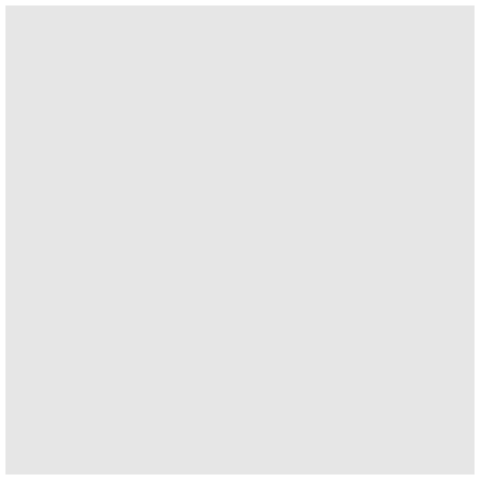

In [58]:
%%R -i df_suicide 

# read the data into 

ggplot(df_suicide) 

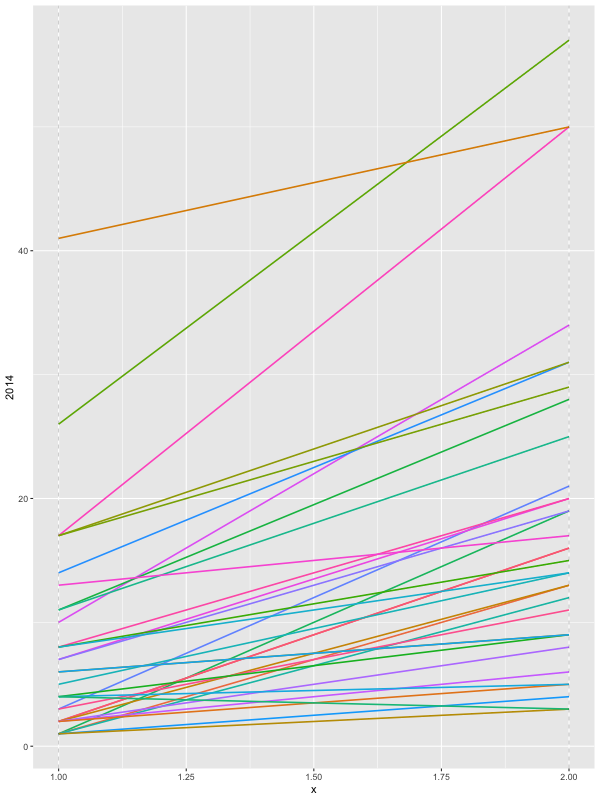

In [59]:
%%R -i df_change -h 800 -w 600

ggplot(df_change) +
geom_segment(aes(x=1, xend=2, y=`2014`, yend=`2022`, col=state), size=.75, show.legend=F) +
geom_vline(xintercept=1, linetype="dashed", size=.1) + 
geom_vline(xintercept=2, linetype="dashed", size=.1) 

In [60]:
df_decade

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,5
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
...,...,...,...,...,...,...,...,...,...,...,...
4756,95550,2014-01-12,Alabama,Huntsville,University Drive,0,5,https://www.gunviolencearchive.org/incident/95550,2014,01-2014,5
4757,95146,2014-01-11,Mississippi,Jackson,3430 W. Capitol Street,0,4,https://www.gunviolencearchive.org/incident/95146,2014,01-2014,4
4758,94514,2014-01-05,Pennsylvania,Erie,829 Parade St,1,3,https://www.gunviolencearchive.org/incident/94514,2014,01-2014,4
4759,92704,2014-01-03,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3,https://www.gunviolencearchive.org/incident/92704,2014,01-2014,4


In [61]:
# number of incidents by state by year

df_deaths = df_decade.groupby(['year', 'state'])['killed'].count()
df_deaths = pd.DataFrame(df_deaths)
df_deaths = df_deaths.reset_index()
df_deaths


,year,state,killed
0,2014,Alabama,2
1,2014,Alaska,1
2,2014,Arizona,1
3,2014,Arkansas,2
4,2014,California,41
...,...,...,...
356,2022,Tennessee,17
357,2022,Texas,50
358,2022,Virginia,20
359,2022,Washington,11


In [62]:
df_deaths_pivot = df_deaths.pivot_table(index='state', columns='year', values='killed', aggfunc='sum').reset_index()
df_deaths_pivot


year,state,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,2.0,4.0,15.0,7.0,14.0,12.0,11.0,23.0,16.0
1,Alaska,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN
2,Arizona,1.0,6.0,4.0,5.0,2.0,6.0,4.0,6.0,13.0
3,Arkansas,2.0,2.0,3.0,3.0,6.0,5.0,13.0,5.0,5.0
4,California,41.0,27.0,46.0,38.0,35.0,49.0,39.0,45.0,50.0
5,Colorado,2.0,3.0,4.0,2.0,8.0,4.0,11.0,13.0,13.0
6,Connecticut,1.0,2.0,6.0,2.0,2.0,3.0,7.0,2.0,3.0
7,Delaware,NaN,1.0,2.0,1.0,1.0,2.0,3.0,7.0,2.0
8,District of Columbia,6.0,3.0,5.0,5.0,6.0,7.0,8.0,16.0,9.0
9,Florida,17.0,26.0,30.0,24.0,30.0,15.0,34.0,31.0,31.0
